### **Hotel Review Sentiment Text Classification**
###  Objective:
- The project automates the classification of hotel guest reviews from TripAdvisor
- into Negative (1-2 stars), Neutral (3 stars)or Positive (4-5 stars).
- This helps hotel management respond effectively and monitor guest satisfaction.


### 1. Libraries
- The project uses Pandas and NumPy for data handling,
- NLTK for text preprocessing,
- Scikit-learn for TF-IDF feature extraction and sentiment classification using SVM and Naive Bayes models,
- WordCloud for text visualization and
- Jupyter Notebook as the execution and analysis environment.

#### Remove comment to install the libraries

In [88]:

# Data handling
# !pip install pandas numpy

# NLP preprocessing
# !pip install nltk

# Machine learning models and evaluation
# !pip install scikit-learn

# Optional: if using Jupyter Notebook for running the code
#!pip install notebook

# !pip install wordcloud
# ! pip install matplotlib
# ! pip install seaborn

In [92]:
# 1. Import Libraries

import pandas as pd
import re
import nltk
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    precision_recall_curve,
    average_precision_score,  # <-- correct spelling
    roc_curve,
    auc
)

from wordcloud import WordCloud
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize

### 2. These NLTK packages below are downloaded to enable tokenization (punkt), removal of common stopwords (stopwords), and lemmatization of words using lexical knowledge (wordnet) during text preprocessing.

In [93]:
# 2. Download Required NLTK Packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [94]:
# 3. Load and Inspect Dataset
df = pd.read_csv('Combined_TripAdvisor_Guest_Reviews_in_ Salalah_Oman_Dataset (1).csv')
df.head(5)

,Hotel Name,User Location,Rating,Review Title,Review Text,Helpful Votes,Trip Type,Stay Date,Created Date,Published Date,Language,Value,Rooms,Location,Cleanliness,Service,Sleep Quality
0,Al Baleed Resort Salalah by Anantara,NaN,5,Ein Erlebnis mit excellenten Mitarbeitern v Ho...,"Wir hatten das große Glück, eine Woche in dies...",0,FRIENDS,31/12/2024,27/12/2024,27/12/2024,German,5,5,5,5,5,5
1,Al Baleed Resort Salalah by Anantara,Paris,5,Three days in a paradise,At our very late arrival Veronica very nice an...,1,NONE,29/02/2024,21/02/2024,20/02/2024,English,5,5,5,5,5,5
2,Al Baleed Resort Salalah by Anantara,Lengnau,5,Wohlfühloase pur,Ein Hotel das keine Wünsche offen lässt. \nWun...,0,SOLO,31/12/2024,27/12/2024,27/12/2024,German,0,0,0,0,0,0
3,Al Baleed Resort Salalah by Anantara,NaN,5,Perfekt👍👍👍,"Die Hotelanlage,- das Essen wie auch das Perso...",0,COUPLES,31/12/2024,26/12/2024,25/12/2024,German,4,5,5,5,5,5
4,Al Baleed Resort Salalah by Anantara,Dubai,5,"Excellent for couples and families, very frien...",Definitely recommended to everyone. Asad and J...,0,NONE,31/12/2024,24/12/2024,23/12/2024,English,3,5,5,5,5,5


**Code Explination**
1. Load the CSV dataset into a Pandas DataFrame.
2. head(5) shows the first 5 rows to inspect data structure and columns.

### 3. Exploratory Data Analysis

**i) Provides a summary of the DataFrame, showing total rows and columns, column names with data types, non-null counts, and memory usage.**

In [95]:
df.info

<bound method DataFrame.info of                                  Hotel Name User Location  Rating  \
0      Al Baleed Resort Salalah by Anantara           NaN       5   
1      Al Baleed Resort Salalah by Anantara         Paris       5   
2      Al Baleed Resort Salalah by Anantara       Lengnau       5   
3      Al Baleed Resort Salalah by Anantara           NaN       5   
4      Al Baleed Resort Salalah by Anantara         Dubai       5   
...                                     ...           ...     ...   
14833                 Salalah Rotana Resort        Munich       5   
14834                 Salalah Rotana Resort        Berlin       4   
14835                 Salalah Rotana Resort     Iowa City       5   
14836                 Salalah Rotana Resort         Dubai       4   
14837                 Salalah Rotana Resort     Germering       4   

                                            Review Title  \
0      Ein Erlebnis mit excellenten Mitarbeitern v Ho...   
1                  

In [96]:
df.dtypes

Hotel Name        object
User Location     object
Rating             int64
Review Title      object
Review Text       object
Helpful Votes      int64
Trip Type         object
Stay Date         object
Created Date      object
Published Date    object
Language          object
Value              int64
Rooms              int64
Location           int64
Cleanliness        int64
Service            int64
Sleep Quality      int64
dtype: object

**ii) Returns the dimensions of the DataFrame as (rows, columns), showing how many rows and columns the dataset has.**

In [97]:
df.shape

(14838, 17)

**iii) Checks each column for missing values and returns the total number of null (NaN) entries per column.**

In [98]:
df.isnull().sum()

Hotel Name           0
User Location     6471
Rating               0
Review Title         0
Review Text          0
Helpful Votes        0
Trip Type           11
Stay Date           11
Created Date         0
Published Date       0
Language             0
Value                0
Rooms                0
Location             0
Cleanliness          0
Service              0
Sleep Quality        0
dtype: int64

**iv) Provides summary statistics for numeric columns, including count, mean, standard deviation, min, 25% percentile, 50% percentile (median), 75% percentile, and max values.**

In [99]:
df.describe()

,Rating,Helpful Votes,Value,Rooms,Location,Cleanliness,Service,Sleep Quality
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,4.477153,0.855304,1.860561,1.706699,1.974862,1.718560,2.651975,1.670576
std,0.903057,1.857103,2.200542,2.250887,2.303951,2.270403,2.325370,2.247174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,5.000000,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,86.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**v) Counts how many times each unique rating appears in the dataset, showing the distribution of ratings.**

In [100]:
df['Rating'].value_counts()

Rating
5    9891
4    3194
3    1025
2     398
1     330
Name: count, dtype: int64

#### Sentiment distribution Graph. (Class Imbalance)

**Code Explination**
- df['Rating'].value_counts() → Counts how many reviews exist for each rating (1–5).
- .plot(kind='bar', color=[...]) → Plots these counts as a vertical bar chart with custom colors for each rating.

<Axes: xlabel='Rating'>

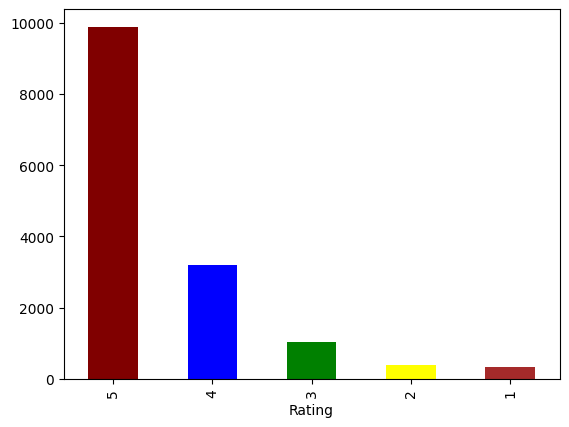

In [101]:
df['Rating'].value_counts().plot(kind='bar', color=['maroon','blue','green','yellow', 'brown'])

**Insights**
1. Most reviews are **5-star**, indicating overall high satisfaction.
2. 4-star reviews are the second most common, followed by 3-star, 2-star, and 1-star reviews.
3. Few negative reviews (1–2 stars) suggest that most customers are satisfied with their stay.
4. The distribution is **skewed toward positive ratings**, which could impact modeling if not balanced.

#### Word Cloud for Review Text

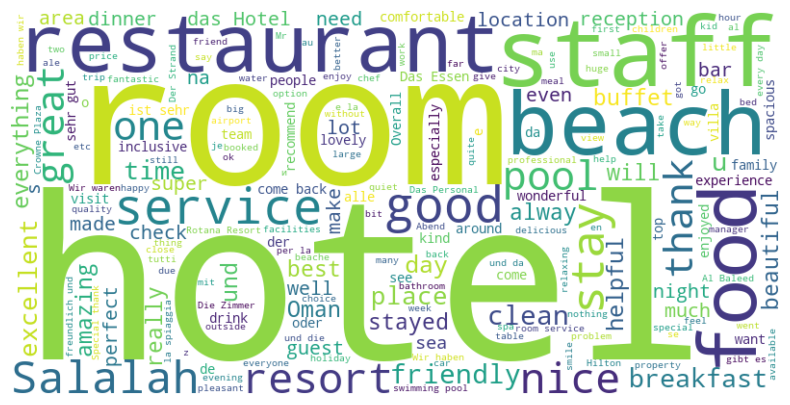

In [102]:
text = " ".join(df['Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Code Explanation:**

1. `from wordcloud import WordCloud` → Imports the WordCloud library to create a visual representation of text.
2. `text = " ".join(df['Review Text'])` → Combines all review texts into one large string.
3. `WordCloud(width=800, height=400, background_color='white').generate(text)` → Creates a word cloud image from the combined text, with white background and specified dimensions.
4. `plt.figure(figsize=(10,5))` → Sets the figure size for the plot.
5. `plt.imshow(wordcloud, interpolation='bilinear')` → Displays the word cloud image with smooth rendering.
6. `plt.axis('off')` → Hides the axes for a cleaner view.
7. `plt.show()` → Shows the word cloud plot.

**Insights:**

- The word cloud highlights the **most frequent words** in the review texts.
- Larger words represent words that appear more often in reviews.
- This helps quickly understand common themes, keywords, and customer opinions from the reviews.

### 4. Filter the English Reviews

In [103]:
# Filter only English reviews
df = df[df['Language'] == 'English'].copy()

# Create Full_Review directly (NO duplicate columns)
df['Full_Review'] = (
    df['Review Title'].fillna('') + ' ' +
    df['Review Text'].fillna('')
)

df.head()

,Hotel Name,User Location,Rating,Review Title,Review Text,Helpful Votes,Trip Type,Stay Date,Created Date,Published Date,Language,Value,Rooms,Location,Cleanliness,Service,Sleep Quality,Full_Review
1,Al Baleed Resort Salalah by Anantara,Paris,5,Three days in a paradise,At our very late arrival Veronica very nice an...,1,NONE,29/02/2024,21/02/2024,20/02/2024,English,5,5,5,5,5,5,Three days in a paradise At our very late arri...
4,Al Baleed Resort Salalah by Anantara,Dubai,5,"Excellent for couples and families, very frien...",Definitely recommended to everyone. Asad and J...,0,NONE,31/12/2024,24/12/2024,23/12/2024,English,3,5,5,5,5,5,"Excellent for couples and families, very frien..."
5,Al Baleed Resort Salalah by Anantara,Salzburg,5,REALLY highly recommended,Before starting saison (20th Dec.)... very cal...,0,COUPLES,31/12/2024,23/12/2024,23/12/2024,English,5,5,5,5,5,5,REALLY highly recommended Before starting sais...
6,Al Baleed Resort Salalah by Anantara,Bacau,5,A wonderful place,"A quiet place, by the sea, with a gorgeous bea...",0,NONE,31/12/2024,23/12/2024,23/12/2024,English,4,5,5,5,5,5,"A wonderful place A quiet place, by the sea, w..."
7,Al Baleed Resort Salalah by Anantara,Bratislava,5,Beautiful & relaxed days in exclusive resort,We have spent beautiful & relaxed days in this...,0,COUPLES,31/12/2024,22/12/2024,21/12/2024,English,0,0,0,0,0,0,Beautiful & relaxed days in exclusive resort W...


**Code Explination**
- Filters the dataset to include **only English reviews**.
- Creates a new column `Full_Review` by **combining the review title and review text**.
- Handles **missing values** in both title and text to avoid errors.
- Prepares the data for **further processing**, like TF-IDF feature extraction or sentiment analysis.

**Output**
- A new column Full_Review is added, which contains the concatenated text of Review Title and Review Text for each row.
- Only rows where the Language column is 'English' are kept.

### 5. Create Sentiment Labels

In [104]:
# Mapping ratings to sentiment categories
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:  # 4, 5
        return 'Positive'

df['Sentiment'] = df['Rating'].apply(rating_to_sentiment)

# Keep only necessary columns
df = df[['Full_Review', 'Rating', 'Sentiment']]

print("English reviews count:", len(df))
df['Sentiment'].value_counts()
df

English reviews count: 8323


,Full_Review,Rating,Sentiment
1,Three days in a paradise At our very late arri...,5,Positive
4,"Excellent for couples and families, very frien...",5,Positive
5,REALLY highly recommended Before starting sais...,5,Positive
6,"A wonderful place A quiet place, by the sea, w...",5,Positive
7,Beautiful & relaxed days in exclusive resort W...,5,Positive
...,...,...,...
14833,Great Escape from Busy Munich We were not sure...,5,Positive
14834,"Fabulous! However! Beautiful hotel, amazing ro...",4,Positive
14835,True Arab Hospitality- Amazing Beach- Perfect ...,5,Positive
14836,Amazing Time Room\n\nComplimentary wifi and d...,4,Positive


**Code Explination**
1. Map numeric ratings (1–5) to three sentiment categories:
- 1–2 → Negative
- 3 → Neutral
- 4–5 → Positive
  
2. Keep only columns needed: Full_Review, Rating, Sentiment.
3. Check the distribution of reviews across sentiment classes.

**Output Explination**
1. The dataset has 8,323 English reviews.
2. Columns retained: Full_Review (text), Rating (1–5), Sentiment (Negative/Neutral/Positive).
3. Reviews are correctly mapped to sentiment categories based on ratings.
4. Dataset is now clean and ready for preprocessing and model training.

### 6. Separate reviews by sentiment

In [105]:
# Separate reviews by sentiment
df_neg = df[df['Sentiment'] == 'Negative']
df_neu = df[df['Sentiment'] == 'Neutral']
df_pos = df[df['Sentiment'] == 'Positive']

# Find the size of the smallest class (Negative)
min_size = len(df_neg)

# Downsample larger classes to match the smallest class
df_neu_balanced = resample(df_neu, n_samples=min_size, random_state=42)
df_pos_balanced = resample(df_pos, n_samples=min_size, random_state=42)

# Combine all classes into a single balanced dataset
df_balanced = pd.concat([df_neg, df_neu_balanced, df_pos_balanced])
df_balanced = df_balanced.sample(frac=1, random_state=42) # Shuffle the dataset randomly

#Checking the number of reviews in each sentiment class
print(df_balanced['Sentiment'].value_counts())


Sentiment
Negative    454
Positive    454
Neutral     454
Name: count, dtype: int64


### 7. Balanced Dataset Graph

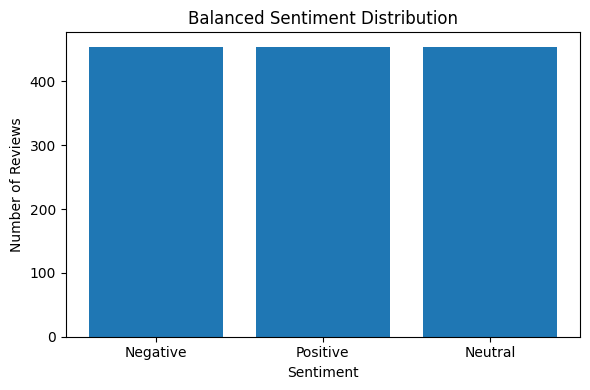

In [106]:
# Get sentiment counts
sentiment_counts = df_balanced['Sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Balanced Sentiment Distribution")
plt.tight_layout()
plt.show()


**Code Explination**

1. Filter reviews by sentiment:

- df_neg = df[df['Sentiment'] == 'Negative'] → Keep only Negative reviews
- df_neu = df[df['Sentiment'] == 'Neutral'] → Keep only Neutral reviews
- df_pos = df[df['Sentiment'] == 'Positive'] → Keep only Positive reviews

2. Find smallest class size:

min_size = len(df_neg) → Determine how many reviews the smallest class has to balance others

3. Downsample larger classes:

- df_neu_balanced = resample(df_neu, n_samples=min_size) → Reduce Neutral reviews to match Negative
- df_pos_balanced = resample(df_pos, n_samples=min_size) → Reduce Positive reviews to match Negative

4. Combine and shuffle dataset:

-cdf_balanced = pd.concat([...]) → Merge Negative, Neutral, and Positive reviews into one dataset
- df_balanced = df_balanced.sample(frac=1) → Shuffle rows to randomize order

5. Check class counts:

- df_balanced['Sentiment'].value_counts() → Verify all sentiment classes now have equal reviews (454 each)

**Output Explination**

This output shows that each sentiment class now has **454 reviews**: 454 Negative, 454 Positive, and 454 Neutral. It confirms that the dataset is perfectly balanced, which prevents any class from dominating during model training. This balanced dataset is now ready for building and training machine learning models.


### 8. Text Preprocessing

In [107]:
# 7. Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


print("Starting text preprocessing...")
df_balanced['Cleaned_Review'] = df_balanced['Full_Review'].apply(preprocess_text)
print("Preprocessing complete!")

# Preview
df_balanced[['Full_Review', 'Cleaned_Review', 'Sentiment']].head(3)

Starting text preprocessing...
Preprocessing complete!


,Full_Review,Cleaned_Review,Sentiment
3240,Not the top Crowne Plaza Salalah resort nee...,top crowne plaza salalah resort need modernize...,Negative
10633,Oman trip The hotel is large. Nicely located. ...,oman trip hotel large nicely located beach cle...,Positive
10613,Well done Rotana Salalah A week at Rotana with...,well done rotana salalah week rotana family we...,Positive


**Code Explination**

1. Stopwords and Lemmatizer:

- stop_words = set(stopwords.words('english')) → Loads common English words like “the”, “is”, “and” to remove later.
- lemmatizer = WordNetLemmatizer() → Initializes a tool to reduce words to their base form (e.g., “running” → “run”).

2. Define preprocessing function:

- Converts text to lowercase for consistency.
- Removes special characters and numbers using re.sub().
- Removes extra spaces.
- Tokenizes text into words.
- Removes stopwords and applies lemmatization.
- Joins tokens back into a cleaned string.

3. Apply preprocessing:

- df_balanced['Cleaned_Review'] = df_balanced['Full_Review'].apply(preprocess_text) → Cleans all reviews in the balanced dataset.

**Output Explination**

- Cleaned text is now ready for machine learning models like SVM or Naive Bayes.
- Important information is retained while noise is removed.

#### 9. Train Test Split

In [108]:
# Select features (cleaned review text) and target (sentiment)
X = df_balanced['Cleaned_Review']  # Input text
y = df_balanced['Sentiment']       # Target labels: Negative, Neutral, Positive

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization (convert text into numeric features)
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)  # Learn vocabulary from training data
X_test_tfidf = tfidf.transform(X_test)        # Transform test data using same vocabulary

print("TF-IDF feature extraction complete!")
df_balanced.head()

TF-IDF feature extraction complete!


,Full_Review,Rating,Sentiment,Cleaned_Review
3240,Not the top Crowne Plaza Salalah resort nee...,2,Negative,top crowne plaza salalah resort need modernize...
10633,Oman trip The hotel is large. Nicely located. ...,5,Positive,oman trip hotel large nicely located beach cle...
10613,Well done Rotana Salalah A week at Rotana with...,5,Positive,well done rotana salalah week rotana family we...
6338,New hotel with average service The hotel is n...,3,Neutral,new hotel average service hotel new service ne...
13508,Beautiful and lovely place to relax! We went t...,5,Positive,beautiful lovely place relax went salalah rota...


**Code Explination**

**1. Select features and target:**

- X = df_balanced['Cleaned_Review'] → Use cleaned review text as input features.
- y = df_balanced['Sentiment'] → Use sentiment labels (Negative, Neutral, Positive) as target.

**2.** Split dataset into training and testing sets:

- train_test_split() → 80% of data for training, 20% for testing.
- stratify=y → Ensures each sentiment class is proportionally represented in both train and test sets.

**3. Initialize TF-IDF vectorizer:**

- TfidfVectorizer(max_features=10000, ngram_range=(1,2)) → Converts text into numeric feature vectors.
- Uses unigrams and bigrams to capture single words and two-word phrases.

**4. Fit and transform training data:**

- tfidf.fit_transform(X_train) → Learns the vocabulary and computes TF-IDF scores for training data.

**5. Transform test data:**

- tfidf.transform(X_test) → Converts test reviews into numeric vectors using the same vocabulary learned from training data.

**6. Print statement:**

- "TF-IDF feature extraction complete!" → Confirms that text has been successfully converted into numeric features for modeling.

**Output Explination**
- Text reviews are now numeric vectors, suitable for machine learning models.

### 10. Training Model using Support Vector Machine (svc)

SVM (Linear Kernel) Evaluation
Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.77      0.79        91
     Neutral       0.73      0.77      0.75        91
    Positive       0.89      0.89      0.89        91

    accuracy                           0.81       273
   macro avg       0.81      0.81      0.81       273
weighted avg       0.81      0.81      0.81       273



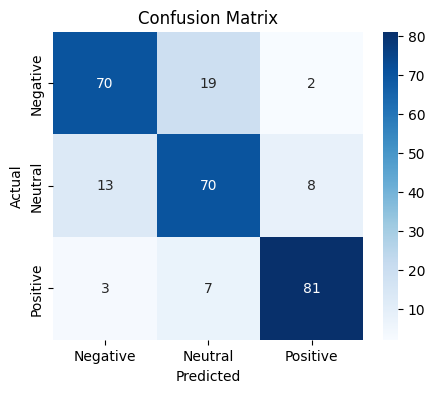

In [109]:
# Initialize SVM with LINEAR kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)
# Predict on test data
y_pred_svm_before = svm_model.predict(X_test_tfidf)

# Evaluate
print("SVM (Linear Kernel) Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_before))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_before))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm_before)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative','Neutral','Positive'], 
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Code Explination**
  
**1. Initialize SVM:**

- svm_model = SVC(kernel='linear', random_state=42) → Use linear kernel for text classification.

**2. Train the model:**

- svm_model.fit(X_train_tfidf, y_train) → Train on TF-IDF features and sentiment labels.

**3. Predict test data:**

- y_pred_svm = svm_model.predict(X_test_tfidf) → Predict sentiment for the test set.

**4. Evaluate performance:**

- accuracy_score(y_test, y_pred_svm) → Overall accuracy (≈ 0.81).
- classification_report → Precision, recall, and F1-score for each class.

**Output Explination**
#### Classification Report Analysis

**1.  Negative class:**

- Precision = 0.81 → 81% of reviews predicted as Negative were correct.
- Recall = 0.77 → 77% of actual Negative reviews were correctly identified.
- F1-score = 0.79 → Balance of precision and recall, fairly good.

**2. Neutral class:**

- Precision = 0.73 → 73% of predicted Neutral reviews were correct.
- Recall = 0.77 → 77% of actual Neutral reviews were correctly identified.
- F1-score = 0.75 → Slightly lower than Negative/Positive, model finds Neutral a bit harder.

**3. Positive class:**

- Precision = 0.89 → 89% of predicted Positive reviews were correct.
- Recall = 0.89 → 89% of actual Positive reviews were correctly identified.
- F1-score = 0.89 → Very good, Positive class is easiest to predict.

#### Overall accuracy: 0.81 → 81% of all test reviews were classified correctly.|
#### Macro average: 0.81 → Average performance across classes without considering class size.
#### Weighted average: 0.81 → Average weighted by class support (all equal here).

**Confusion Matrix Analysis**

**1. Negative row:**

- 70 reviews correctly predicted as Negative
- 19 reviews misclassified as Neutral
- 2 reviews misclassified as Positive
- **Insight:** Most Negative reviews are correctly detected, but some are confused with Neutral.

**2. Neutral row:**

- 70 reviews correctly predicted as Neutral
- 13 reviews misclassified as Negative
- 8 reviews misclassified as Positive
- **Insight:** Neutral reviews are fairly well-predicted, though some are mistaken for Negative or Positive.

**3. Positive row:**

- 81 reviews correctly predicted as Positive
- 3 reviews misclassified as Negative
- 7 reviews misclassified as Neutral
- **Insight:** Positive reviews have the highest accuracy; only a few misclassifications.


#### 11. Training Model using Multinomial Naive Bayes

 Multinomial Naive Bayes Evaluation 
Accuracy: 0.7838827838827839

Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.89      0.77        91
     Neutral       0.83      0.54      0.65        91
    Positive       0.88      0.92      0.90        91

    accuracy                           0.78       273
   macro avg       0.80      0.78      0.78       273
weighted avg       0.80      0.78      0.78       273



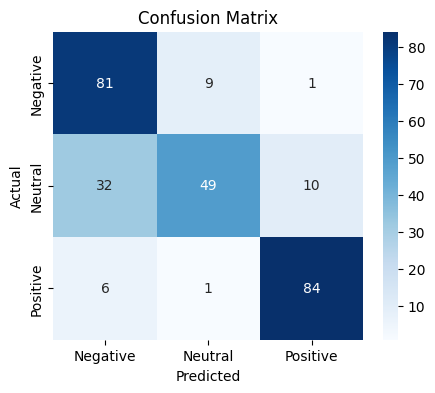

In [110]:
# Initialize Multinomial Naive Bayes
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_mnb = mnb_model.predict(X_test_tfidf)

# Evaluate performance
print(" Multinomial Naive Bayes Evaluation ")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mnb)  # replace y_pred_mnb with y_pred_svm if needed

# Plot confusion matrix as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Code Explination**
- **Initialize MNB:**
    
    `mnb_model = MultinomialNB()` → Sets up a Multinomial Naive Bayes classifier, good for text classification using TF-IDF features.
    
- **Train the model:**
    
    `mnb_model.fit(X_train_tfidf, y_train)` → Learns patterns from the training reviews and their sentiment labels.
    
- **Predict test data:**
    
    `y_pred_mnb = mnb_model.predict(X_test_tfidf)` → Predicts sentiment labels for the test set reviews.
    
- **Evaluate accuracy:**
    
    `accuracy_score(y_test, y_pred_mnb)` → Calculates overall accuracy of the predictions (~0.78).
    
- **Evaluate class-wise performance:**
    
    `classification_report(y_test, y_pred_mnb)` → Shows precision, recall, and F1-score for Negative, Neutral, and Positive classes.
    
- **Check misclassifications:**
    
    `confusion_matrix(y_test, y_pred_mnb)` → Displays actual vs predicted counts for each sentiment class.
  
**Output Explination**
- **Overall Accuracy:** 0.78 → 78% of all test reviews were classified correctly.
- **Negative Class:**
    - Precision = 0.68 → 68% of predicted Negative reviews were actually Negative.
    - Recall = 0.89 → 89% of actual Negative reviews were correctly identified.
    - F1-score = 0.77 → Balance between precision and recall, fairly good.
- **Neutral Class:**
    - Precision = 0.83 → 83% of predicted Neutral reviews were correct.
    - Recall = 0.54 → Only 54% of actual Neutral reviews were correctly predicted.
    - F1-score = 0.65 → Neutral is harder for the model, lower performance.
- **Positive Class:**
    - Precision = 0.88 → 88% of predicted Positive reviews were correct.
    - Recall = 0.92 → 92% of actual Positive reviews were correctly identified.
    - F1-score = 0.90 → Best performance among all classes.

#### Confusion matrix analysis
1. **Negative Class (Row 0):**
    - 81 reviews correctly predicted as Negative.
    - 9 reviews misclassified as Neutral.
    - 1 review misclassified as Positive.
    - **Insight:** Negative reviews are mostly correctly detected, small confusion with Neutral.
2. **Neutral Class (Row 1):**
    - 49 reviews correctly predicted as Neutral.
    - 32 reviews misclassified as Negative.
    - 10 reviews misclassified as Positive.
    - **Insight:** Neutral reviews are harder for the model; many are predicted as Negative.
3. **Positive Class (Row 2):**
    - 84 reviews correctly predicted as Positive.
    - 6 reviews misclassified as Negative.
    - 1 review misclassified as Neutral.
    - **Insight:** Positive reviews are predicted very accurately, few errors.

### 12. HyperParameter Tunig for SVM using GridSearchCV

In [112]:
from sklearn.svm import LinearSVC
# 1. Define LinearSVC model
svm_model = LinearSVC(max_iter=2000, random_state=42)

# 2. Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10]  # Regularization strength
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',  # Since dataset is balanced
    n_jobs=-1
)

**Code Explination**
- **LinearSVC Initialization:**
    
    `svm_model = LinearSVC(max_iter=2000, random_state=42)` → Sets up a linear kernel SVM with enough iterations to converge.
    
- **Parameter Grid:**
    
    `param_grid = {'C': [0.01, 0.1, 1, 10]}` → Defines different regularization strengths (`C`) to test.
    
- **GridSearchCV:**
    - `GridSearchCV` tries all `C` values using **5-fold cross-validation**.
    - `scoring='accuracy'` → Evaluates each model based on accuracy since the dataset is balanced.
    - `n_jobs=-1` → Uses all CPU cores for faster computation.

In [113]:
# 4. Fit GridSearchCV to training data
grid_search.fit(X_train_tfidf, y_train)

# 5. Best hyperparameter
print("Best C:", grid_search.best_params_)

# 6. Use best model for predictions
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_tfidf)

# 7. Evaluate performance
print("SVM with Hyperparameter Tuning Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Best C: {'C': 0.1}
SVM with Hyperparameter Tuning Evaluation
Accuracy: 0.8205128205128205

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.80      0.81        91
     Neutral       0.80      0.73      0.76        91
    Positive       0.85      0.93      0.89        91

    accuracy                           0.82       273
   macro avg       0.82      0.82      0.82       273
weighted avg       0.82      0.82      0.82       273



**Code Explination**
- **Fit GridSearchCV:**
    
    `grid_search.fit(X_train_tfidf, y_train)` → Finds the best `C` value by training and validating the model on folds.
    
- **Best Hyperparameter:**
    
    `grid_search.best_params_` → Returns the `C` value that gives the best accuracy.
    
- **Predict Test Data:**
    
    `best_svm.predict(X_test_tfidf)` → Predicts sentiments on the test set using the tuned model.
    
- **Evaluation:**
    - `accuracy_score(y_test, y_pred_svm)` → Overall accuracy of the model.
    - `classification_report(y_test, y_pred_svm)` → Precision, recall, F1-score for each sentiment class.
      
**Output Explination**

- **Best C:** `0.1` → The model performed best with `C=0.1`, balancing margin size and classification error.
- **Accuracy:** `0.82` → The model correctly classified **82%** of reviews in the test set.
- **Classification Report:**
    - **Negative:** Precision 0.81, Recall 0.80 → 81% of predicted negatives are correct; 80% of actual negatives were identified.
    - **Neutral:** Precision 0.80, Recall 0.73 → Slightly lower recall; some neutrals misclassified.
    - **Positive:** Precision 0.85, Recall 0.93 → Very good at identifying positive reviews.
- **Macro avg & Weighted avg:** Around 0.82 → Model performs well across all classes.

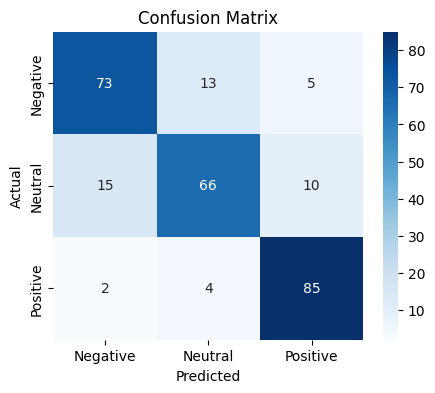

In [114]:
# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Code Explination**
- **Confusion Matrix:**
    - Visualizes correct vs. incorrect predictions for each class.
    - `sns.heatmap` → Heatmap representation for easy interpretation.

**Output Explination**
- **Negative row (Actual Negative = 91):**
    - 73 correctly predicted as Negative
    - 13 misclassified as Neutral
    - 5 misclassified as Positive
        
        → Most negative reviews are correctly identified, with some confusion mostly as Neutral.
        
- **Neutral row (Actual Neutral = 91):**
    - 66 correctly predicted as Neutral
    - 15 misclassified as Negative
    - 10 misclassified as Positive
        
        → Neutral class is the hardest to predict, some misclassified as Negative or Positive.
        
- **Positive row (Actual Positive = 91):**
    - 85 correctly predicted as Positive
    - 2 misclassified as Negative
    - 4 misclassified as Neutral
        
        → Positive reviews are predicted very well with few misclassifications.

### 13. HyperParameter Tuning for MultinomialNB

Best alpha: {'alpha': 0.1}
Test Accuracy: 0.8131868131868132

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.91      0.81        91
     Neutral       0.89      0.60      0.72        91
    Positive       0.88      0.92      0.90        91

    accuracy                           0.81       273
   macro avg       0.83      0.81      0.81       273
weighted avg       0.83      0.81      0.81       273



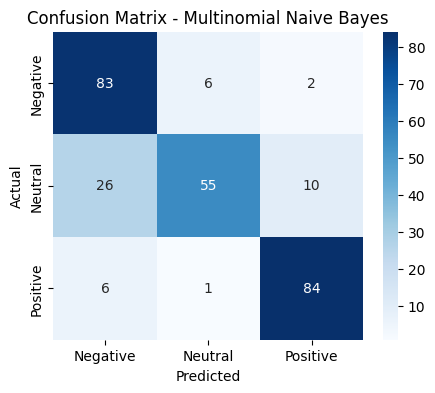

In [115]:
# Parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Laplace smoothing
}

# Initialize MNB
mnb = MultinomialNB()

# Grid Search with 5-fold CV
grid = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf, y_train)

# Best alpha
print("Best alpha:", grid.best_params_)

# Evaluate on test set
best_mnb = grid.best_estimator_
y_pred_best = best_mnb.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)  # y_pred_best from tuned MNB

# Plot as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

**Code Explination**
- **Parameter Grid:**
    
    `param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}` → Tests different **Laplace smoothing values** (`alpha`) to prevent zero probabilities for unseen words.
    
- **Initialize MNB:**
    `mnb = MultinomialNB()` → Sets up the Multinomial Naive Bayes classifier.
    
- **Grid Search:**
    - `GridSearchCV` runs **5-fold cross-validation** on training data.
    - `scoring='accuracy'` → Optimizes for highest accuracy.
    - `n_jobs=-1` → Uses all CPU cores to speed up the process.

- **Fit Grid Search:**

  
    `grid.fit(X_train_tfidf, y_train)` → Finds the best `alpha` value that maximizes cross-validation accuracy.
    
- **Best Alpha:**
    `grid.best_params_` → Shows the `alpha` with the best performance (here `0.1`).
    
- **Predict on Test Data:**
     `best_mnb.predict(X_test_tfidf)` → Uses the tuned model to predict sentiments on test set.
    
- **Evaluate:**
    - `accuracy_score(y_test, y_pred_best)` → Overall accuracy of predictions.
    - `classification_report(y_test, y_pred_best)` → Precision, recall, F1-score for each class.
    - `confusion_matrix(y_test, y_pred_best)` → Shows correct vs. incorrect predictions per class.

**Output Explination**
- **Best alpha:** `0.1` → Small smoothing works best for this dataset.
- **Test Accuracy:** `0.813` → The model correctly classified **≈81%** of reviews.
- **Classification Report:**
    - **Negative:** Precision 0.72, Recall 0.91 → Most actual negatives correctly detected; some predicted as neutral/positive.
    - **Neutral:** Precision 0.89, Recall 0.60 → High precision but lower recall; many neutrals misclassified as negative or positive.
    - **Positive:** Precision 0.88, Recall 0.92 → Positive reviews are accurately identified.

#### **Confusion Matrix Analysis:**

1. **Negative reviews (Actual = 91)**
    - 83 correctly predicted as Negative
    - 6 misclassified as Neutral
    - 2 misclassified as Positive
        
        → Negative reviews are mostly detected correctly.
        
2. **Neutral reviews (Actual = 91)**
    - 55 correctly predicted as Neutral
    - 26 misclassified as Negative
    - 10 misclassified as Positive
    → Neutral is the hardest class; many misclassified as Negative.
        
3. **Positive reviews (Actual = 91)**
    - 84 correctly predicted as Positive
    - 6 misclassified as Negative
    - 1 misclassified as Neutral
    → Positive reviews are classified very accurately.

### 14. ROC-Curve after Tuning

#### i) SVM

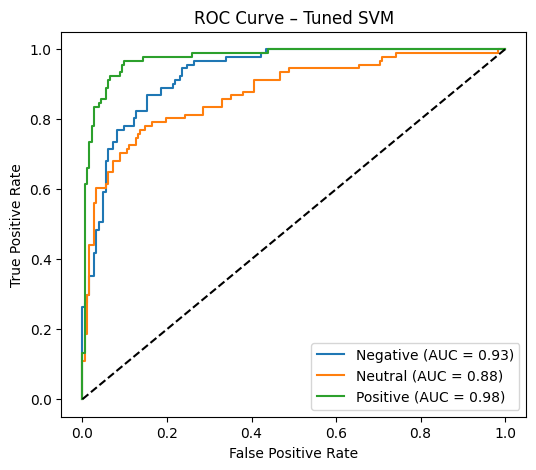

In [116]:
# Binarize labels
classes = ['Negative', 'Neutral', 'Positive']
y_test_bin = label_binarize(y_test, classes=classes)

# One-vs-Rest SVM with decision scores
svm_ovr = OneVsRestClassifier(best_svm)
y_score_svm = svm_ovr.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)

# Plot ROC curve for each class
plt.figure(figsize=(6,5))
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Tuned SVM')
plt.legend()
plt.show()


#### ii) Naive Bayes

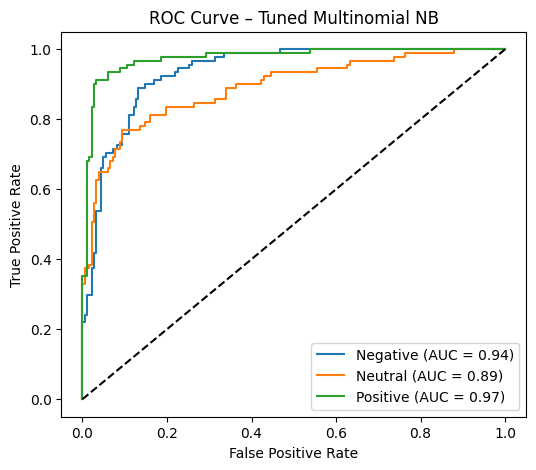

In [117]:
# Get probability scores
y_score_mnb = best_mnb.predict_proba(X_test_tfidf)

plt.figure(figsize=(6,5))
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_mnb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Tuned Multinomial NB')
plt.legend()
plt.show()



#### **ROC Curve Code – Explanation**

- **`roc_auc_score()`**
    
    → Calculates how well the model separates the sentiment classes.
    
    → Value ranges from **0 to 1** (higher is better).
    
- **`y_test_bin`**
    
    → True sentiment labels converted into binary format (needed for multiclass ROC).
    
- **`y_score_svm` / `y_score_mnb`**
    
    → Model confidence scores (not class labels).
    
- **`average="macro"`**
    
    → Computes ROC for each class and takes the average.
    
- **Bar plot (`plt.bar`)**
    
    → Visually compares ROC AUC of **SVM vs Naive Bayes**.
    

#### **What ROC shows:**

- How well the model **distinguishes Positive, Neutral, and Negative reviews**.
- Higher bar = **better classification ability**.

### 15. Precision-Recall after Tuning

#### i) SVM

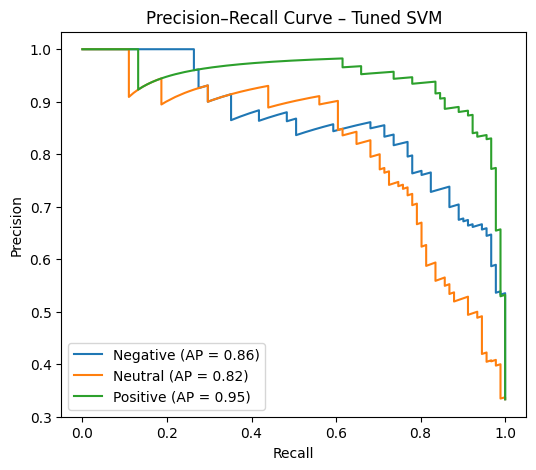

In [118]:
plt.figure(figsize=(6,5))
for i, label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i], y_score_svm[:, i]
    )
    ap = average_precision_score(y_test_bin[:, i], y_score_svm[:, i])
    plt.plot(recall, precision, label=f'{label} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Tuned SVM')
plt.legend()
plt.show()


#### ii) Naive Bayes

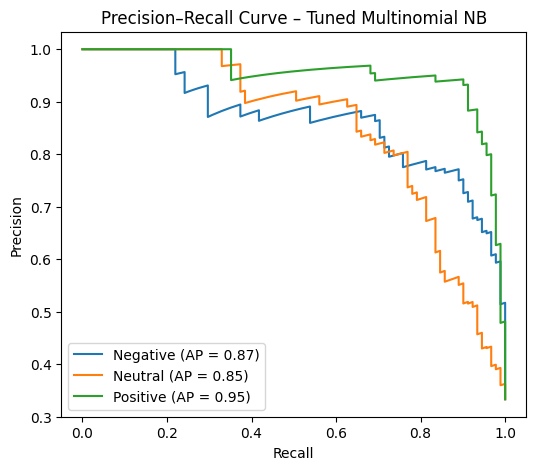

In [119]:
plt.figure(figsize=(6,5))
for i, label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i], y_score_mnb[:, i]
    )
    ap = average_precision_score(y_test_bin[:, i], y_score_mnb[:, i])
    plt.plot(recall, precision, label=f'{label} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Tuned Multinomial NB')
plt.legend()
plt.show()


#### Precision - Recall Curve Code – Explanation

- **`average_precision_score()`**
     → Measures balance between **precision** and **recall**.
    
- **Precision**
     → How many predicted sentiments are correct.
    
- **Recall**
     → How many actual sentiments are correctly found.
    
- **Macro averaging**
     → Treats all classes equally.
    
- **Bar plot**
     → Compares overall Precision–Recall performance of both models.
    

#### What Precision–Recall shows:

- Model’s ability to **avoid false predictions**.
- Especially useful when class distribution matters.

### 16. Comparison table for SVM and Multinomial Naive Bayes

In [120]:
# Create a comparison table for SVM and Multinomial Naive Bayes
comparison_results = {
    "Model": ["SVM (Linear Kernel)", "Multinomial Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm_before),
        accuracy_score(y_test, y_pred_mnb)
    ],
    "Precision": [
        precision_score(y_test,  y_pred_svm_before, average='weighted'),
        precision_score(y_test, y_pred_mnb, average='weighted')
    ],
    "Recall": [
        recall_score(y_test,  y_pred_svm_before, average='weighted'),
        recall_score(y_test, y_pred_mnb, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test,  y_pred_svm_before, average='weighted'),
        f1_score(y_test, y_pred_mnb, average='weighted')
    ]
}
# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
# Display the comparison table
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,SVM (Linear Kernel),0.809524,0.811077,0.809524,0.809911
1,Multinomial Naive Bayes,0.783883,0.798464,0.783883,0.775996


**Code Explination**
- Computes metrices accuracy, precision, recall and F1-Score for **two models**:
    - Support Vector Machine
    - Multinomial Naive Bayes
- Uses the **test labels (`y_test`)** and each model’s predictions (`y_pred_svm`, `y_pred_mnb`).
- Applies **weighted averaging** to handle class imbalance.
- Stores all metric values in a dictionary.
- Converts the results into a **pandas DataFrame**.
- Displays a **comparison table** showing performance of both models side by side.

### 17. Comparison Graph for SVM and Naive Bayes

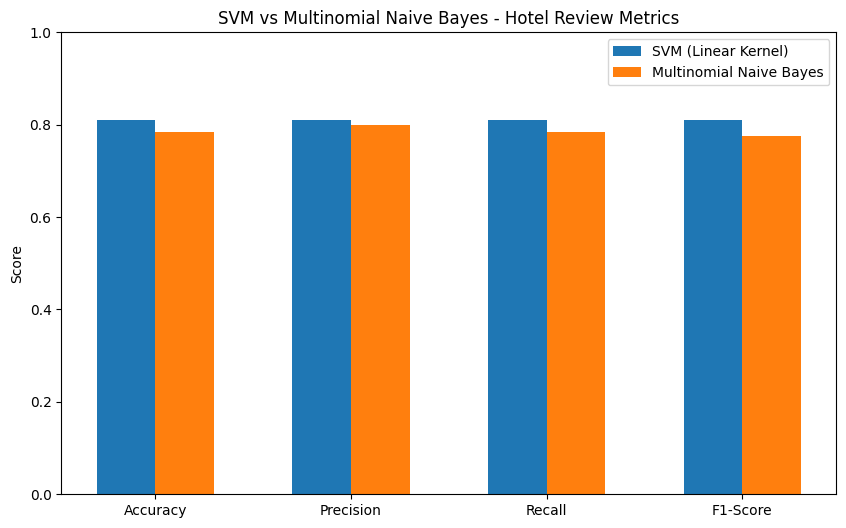

In [122]:
# Plotting grouped bar chart
plt.figure(figsize=(10,6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = range(len(metrics))

# Plot SVM bars (left shifted)
plt.bar([i-0.15 for i in x], comparison_df.iloc[0,1:], width=0.3, label=comparison_df["Model"][0])

# Plot Naive Bayes bars (right shifted)
plt.bar([i+0.15 for i in x], comparison_df.iloc[1,1:], width=0.3, label=comparison_df["Model"][1])

# X-axis labels and title
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("SVM vs Multinomial Naive Bayes - Hotel Review Metrics")
plt.legend()
plt.show()

**Code Explination**
- Imports **matplotlib** to create visual plots.
- Creates a **figure** with size 10×6 for better readability.
- Defines evaluation metrics: **Accuracy, Precision, Recall, and F1-Score**.
- Plots a **grouped bar chart**:
    - **Left bars** represent the **SVM (Linear Kernel)** model.
    - **Right bars** represent the **Multinomial Naive Bayes** model.

**Insights**
- The SVM (Linear Kernel) is the mathematically superior choice. It offers higher overall accuracy and a more balanced performance profile, making it better suited for handling the linguistic nuances and high-dimensional nature of textual review data.

### 18. Comparison table for SVM and Multinomial Naive Bayes after Tuning

In [123]:
# Create a comparison table for tuned models
comparison_results_tuned = {
    "Model": ["SVM (After Tuning)", "Multinomial Naive Bayes (After Tuning)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm),     # Tuned SVM predictions
        accuracy_score(y_test, y_pred_best)     # Tuned NB predictions
    ],
    "Precision": [
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_best, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_best, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_best, average='weighted')
    ]
}

# Convert to DataFrame
comparison_df_tuned = pd.DataFrame(comparison_results_tuned)

# Display the comparison table
comparison_df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,SVM (After Tuning),0.820513,0.818764,0.820513,0.818434
1,Multinomial Naive Bayes (After Tuning),0.813187,0.827945,0.813187,0.807725


### 19. Comparison Graph for SVM and Naive Bayes

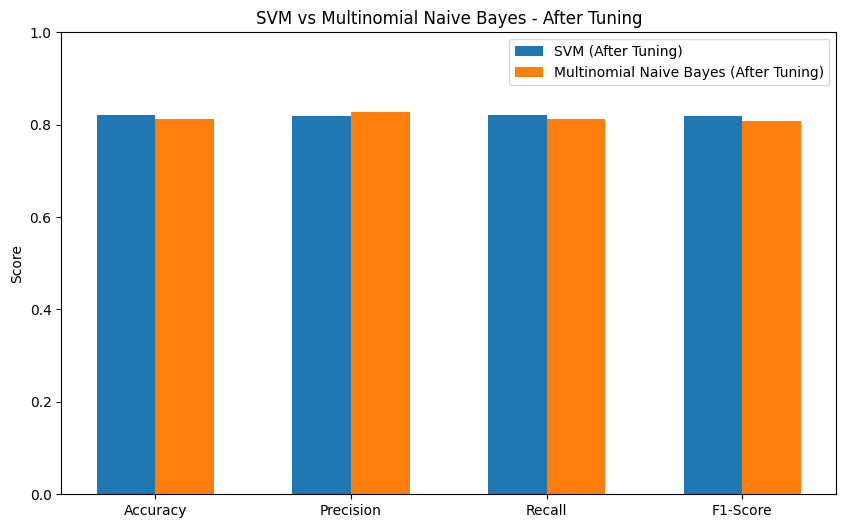

In [124]:
# Plotting grouped bar chart after tuning
plt.figure(figsize=(10,6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = range(len(metrics))

# Plot SVM bars (left shifted)
plt.bar([i-0.15 for i in x], comparison_df_tuned.iloc[0,1:], width=0.3, label=comparison_df_tuned["Model"][0])

# Plot Naive Bayes bars (right shifted)
plt.bar([i+0.15 for i in x], comparison_df_tuned.iloc[1,1:], width=0.3, label=comparison_df_tuned["Model"][1])

# X-axis labels and title
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("SVM vs Multinomial Naive Bayes - After Tuning")
plt.legend()
plt.show()


### 20. Most Frequent terms in Hotel review corpus (WordCloud)

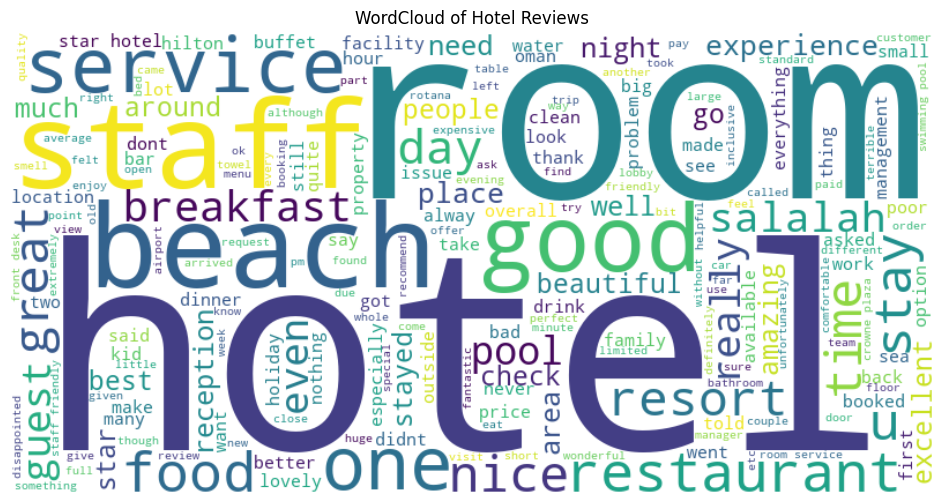

In [125]:
#Combine all cleaned reviews into one text
all_reviews_text = ' '.join(df_balanced['Cleaned_Review'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # optional color map
    max_words=200
).generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Hotel Reviews")
plt.show()

### 21. Hotel Review Sentiment Analysis

In [127]:
# Function to predict sentiment (English reviews only)
def predict_sentiment(title, review, model, vectorizer):
    # Combine title and review text
    text = title + " " + review
    
    # Preprocess text
    cleaned_text = preprocess_text(text)
    
    # Check if cleaned text is empty
    if cleaned_text.strip() == "":
        return "Error: Input text must be in English and non-empty"
    
    # Transform text to TF-IDF features
    text_tfidf = vectorizer.transform([cleaned_text])
    
    # Predict sentiment
    prediction = model.predict(text_tfidf)
    
    return prediction[0]


In [129]:
# Input example from user
new_title = input("Enter the review title (English only): ")
new_review = input("Enter the review text (English only): ")
# Predict using the tuned SVM
svm_prediction = predict_sentiment(new_title, new_review, best_svm, tfidf)

# Display the result
print("\nPredicted Sentiment (Tuned SVM):", svm_prediction)

Enter the review title (English only):  Nice resort, unfortunately with swabs
Enter the review text (English only):  In itself a very nice resort, located directly on the sea with the possibility of beautiful beach walks followed by restaurant visits. And the staff are also courteous and friendly. The breakfast buffet is very good and something for every taste. The dinner is in my opinion not the price-performance level. It is worth visiting the surrounding restaurants.  Unfortunately, a few memorabilia were stolen from my suitcase during my stay. Nothing valuable, but just souvenirs.  The things were definitely still available in the hotel, I bought a souvenir only in this hotel. After checking out the suitcase was constantly in my company (carry-on). What also annoys me a little is that the hotel has not commented on the problem in response to a direct email, no response whatsoever.  Too bad  Michael



Predicted Sentiment (Tuned SVM): Neutral


**Code Explination**
- **Define prediction function**
    
    `predict_sentiment(title, review, model, vectorizer)`
    → Creates a reusable function to predict sentiment from user input.
    
- **Combine title and review**
    
    `text = title + " " + review`
    → Merges the review title and review text into one sentence.
    
- **Preprocess text**
    
    `cleaned_text = preprocess_text(text)`
    → Converts text to lowercase, removes symbols, stopwords, and applies lemmatization.
    
- **Check empty input**
    
    `if cleaned_text.strip() == ""`
    → Ensures the input is valid English text after cleaning.
    
- **Convert text to TF-IDF features**
    
    `text_tfidf = vectorizer.transform([cleaned_text])`
    → Converts text into numerical form using the same TF-IDF model used during training.
    
- **Predict sentiment**
    
    `prediction = model.predict(text_tfidf)`
    → Uses the **tuned SVM model (`best_svm`)** to predict sentiment.
    
- **Return prediction**
    
    `return prediction[0]`
    → Returns the predicted sentiment label (Negative / Neutral / Positive).
    
- **Take user input**
    
    `input()`
    → Allows the user to enter a review title and text.
    
- **Predict using tuned SVM**
    
    `svm_prediction = predict_sentiment(..., best_svm, tfidf)`
    → Uses the **best hyperparameter-tuned SVM model** for prediction.
    
- **Display output**
    
    `print()`
    → Shows the predicted sentiment to the user.


**Output**
- Shows **one sentiment result**: **Positive**, **Neutral**, or **Negative**
- Prediction is based on the **user’s review text**
- Uses the **tuned SVM model** for better accuracy
- If input is invalid, shows an **error message**